<a href="https://colab.research.google.com/github/eduarda-mota/analise-dados-covid-19/blob/main/Projeto_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementação de um algoritmo de Machine Learning para análise e previsão da evolução da Covid19, com dados referentes ao período de 24/02/2020 a 04/09/2020.

Os dados foram retirados em 04/09/2020 da Organização Mundial da Saúde:

https://covid19.who.int/table

In [ ]:
# Importação das bibliotecas

import numpy as np
import pandas as pd

In [ ]:
# Leitura dos dados
covidmundial = pd.read_csv('/content/drive/MyDrive/Análise de Dados - Udemy (2)/covid19_mundial.csv', sep = ',')

In [ ]:
covidmundial

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
39428,2020-08-31,ZW,Zimbabwe,AFRO,6,6412,0,196
39429,2020-09-01,ZW,Zimbabwe,AFRO,85,6497,6,202
39430,2020-09-02,ZW,Zimbabwe,AFRO,62,6559,1,203
39431,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206


In [ ]:
# Número de mortes acumuladas por país
totaldeaths = covidmundial.groupby('country').cumulative_deaths.max()

In [ ]:
# Organização em ordem decrescente (mortes acumuladas)
totaldeaths.sort_values(ascending = False).head(15)

country
United States of America      184614
Brazil                        123780
India                          68472
Mexico                         65816
The United Kingdom             41527
Italy                          35507
France                         30556
Peru                           29259
Spain                          29234
Iran (Islamic Republic of)     21926
Colombia                       20348
Russian Federation             17649
South Africa                   14389
Chile                          11422
Belgium                         9899
Name: cumulative_deaths, dtype: int64

In [ ]:
# Número de casos acumulados por país
casos_total = covidmundial.groupby('country').cumulative_cases.max()

In [ ]:
# Organização em ordem decrescente (casos acumulados)
casos_total.sort_values(ascending = False).head(15)

country
United States of America      6050444
Brazil                        3997865
India                         3936747
Russian Federation            1015105
Peru                           663437
Colombia                       633339
South Africa                   633015
Mexico                         610957
Spain                          488513
Argentina                      439172
Chile                          416501
Iran (Islamic Republic of)     380746
The United Kingdom             340415
Bangladesh                     319686
Saudi Arabia                   318319
Name: cumulative_cases, dtype: int64

In [ ]:
# Selecionando o Brasil
covidbrasil = covidmundial.loc[covidmundial.country == 'Brazil']

In [ ]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [ ]:
# Dimensão dos dados
covidbrasil.shape

(192, 8)

In [ ]:
# Análise do tipo das variáveis
covidbrasil.dtypes

date                 object
country_code         object
country              object
who_region           object
new_cases             int64
cumulative_cases      int64
new_deaths            int64
cumulative_deaths     int64
dtype: object

In [ ]:
# Campos nulos
covidbrasil.isnull().sum()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [ ]:
covidmundial.isnull().sum()

date                   0
country_code         175
country                0
who_region             0
new_cases              0
cumulative_cases       0
new_deaths             0
cumulative_deaths      0
dtype: int64

In [ ]:
# Valores negativos (novos casos)
covidmundial.loc[covidmundial.new_cases < 0, :]

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
25,2020-03-20,AF,Afghanistan,EMRO,-2,24,0,0
1095,2020-03-24,AG,Antigua and Barbuda,AMRO,-2,3,0,0
1636,2020-03-19,AW,Aruba,AMRO,-3,5,0,0
2414,2020-03-20,BS,Bahamas,AMRO,-3,4,0,0
2960,2020-03-20,BB,Barbados,AMRO,-1,5,0,0
...,...,...,...,...,...,...,...,...
36347,2020-03-19,TT,Trinidad and Tobago,AMRO,-2,9,0,0
37112,2020-05-25,UG,Uganda,AFRO,-8,304,0,0
37140,2020-06-22,UG,Uganda,AFRO,-68,755,0,0
38030,2020-03-21,VI,United States Virgin Islands,AMRO,-1,6,0,0


In [ ]:
# Contagem dos valores negativos (novos casos)
covidmundial.loc[covidmundial.new_cases < 0, :].count()

date                 82
country_code         81
country              82
who_region           82
new_cases            82
cumulative_cases     82
new_deaths           82
cumulative_deaths    82
dtype: int64

In [ ]:
# Contagem dos valores negativos (novas mortes)
covidmundial.loc[covidmundial.new_deaths < 0, :].count()

date                 28
country_code         28
country              28
who_region           28
new_cases            28
cumulative_cases     28
new_deaths           28
cumulative_deaths    28
dtype: int64

In [ ]:
# Contagem dos valores negativos (novos casos - Brasil)
covidbrasil.loc[covidbrasil.new_cases < 0, :].count()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [ ]:
# Contagem dos valores negativos (novas mortes - Brasil)
covidbrasil.loc[covidbrasil.new_deaths < 0, :].count()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [ ]:
# Criação de um DataFrame com a soma dos casos e das mortes de todos os países, por data
covidmundial_sum = covidmundial.groupby('date').agg({'new_cases':'sum', 'cumulative_cases':'sum', 'new_deaths':'sum', 'cumulative_deaths':'sum'}).reset_index()

In [ ]:
covidmundial_sum

,date,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-01-04,1,1,0,0
1,2020-01-05,0,1,0,0
2,2020-01-06,3,4,0,0
3,2020-01-07,0,4,0,0
4,2020-01-08,0,4,0,0
...,...,...,...,...,...
240,2020-08-31,267850,25144425,5417,844473
241,2020-09-01,212698,25357123,3980,848453
242,2020-09-02,248989,25606112,4370,852823
243,2020-09-03,279613,25885725,6317,859140


#  Dados Estatísticos

In [ ]:
# Dados Estatísticos (Brasil)
covidbrasil.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,192.000000,1.920000e+02,192.000000,192.000000
mean,20822.213542,1.097211e+06,644.687500,41098.796875
std,19158.201448,1.268914e+06,482.608603,41370.781794
min,0.000000,5.000000e+00,0.000000,0.000000
25%,1819.250000,2.180850e+04,114.750000,1198.250000
50%,17259.000000,4.818030e+05,631.500000,28356.000000
75%,38775.500000,2.020695e+06,1112.750000,76978.750000
max,69074.000000,3.997865e+06,1595.000000,123780.000000


In [ ]:
# Moda (novos casos - Brasil)
covidbrasil.new_cases.mode()

0    0
Name: new_cases, dtype: int64

In [ ]:
# Moda (novas mortes - Brasil)
covidbrasil.new_deaths.mode()

0    0
Name: new_deaths, dtype: int64

# Análise dos Outliers

In [ ]:
import plotly.express as px

In [ ]:
# Boxplot dos casos acumulados - Brasil
px.box(covidbrasil, y = 'cumulative_cases')

In [ ]:
# Boxplot das mortes acumuladas - Brasil
px.box(covidbrasil, y = 'cumulative_deaths')

# Teste de Normalidade

In [ ]:
import seaborn as sns

**Histograma**

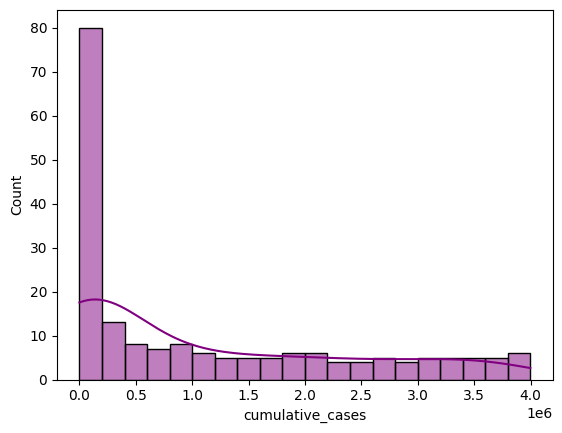

In [ ]:
# Histograma dos casos acumulados - Brasil
sns.histplot(covidbrasil, x = 'cumulative_cases', bins = 20, color = "purple", kde = True, stat = "count");

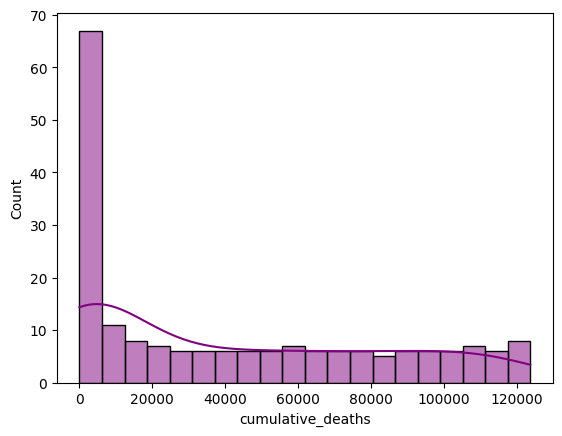

In [ ]:
# Histograma das mortes acumuladas - Brasil
sns.histplot(covidbrasil, x = 'cumulative_deaths', bins = 20, color = "purple", kde = True, stat = "count");

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

**QQplot**

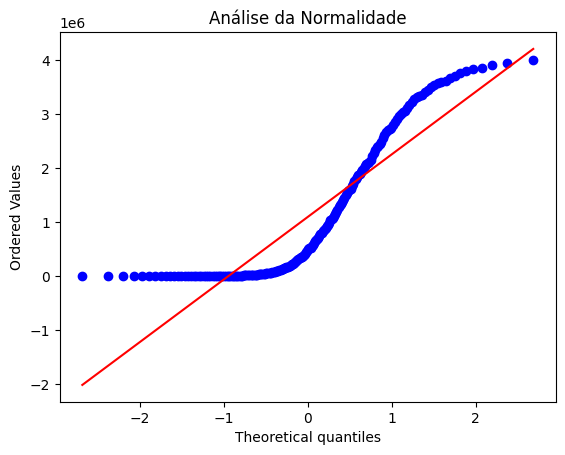

In [ ]:
# QQplot dos casos acumulados - Brasil
stats.probplot(covidbrasil['cumulative_cases'], dist = "norm", plot = plt)
plt.title("Análise da Normalidade")
plt.show()

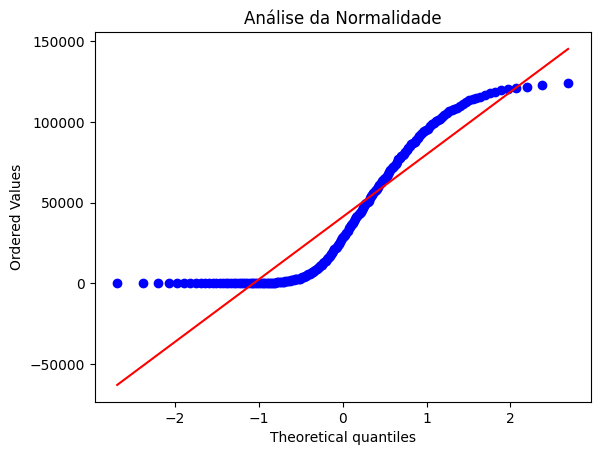

In [ ]:
# QQplot das mortes acumuladas - Brasil
stats.probplot(covidbrasil['cumulative_deaths'], dist = "norm", plot = plt)
plt.title("Análise da Normalidade")
plt.show()

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

**Teste de Kolmogorov-Smirnov**

In [ ]:
# Teste de Kolmogorov-Smirnov para casos acumulados - Brasil
estatistica, p = statsmodels.stats.diagnostic.lilliefors(covidbrasil.cumulative_cases, dist = 'norm')
print('Estatística do teste (D) =', round(estatistica, 2))
print('p_valor =', p)

Estatística do teste (D) = 0.2
p_valor = 0.0009999999999998899


In [ ]:
# Teste de Kolmogorov-Smirnov para mortes acumuladas - Brasil
estatistica, p = statsmodels.stats.diagnostic.lilliefors(covidbrasil.cumulative_deaths, dist = 'norm')
print ('Estatística do teste (D) =', round(estatistica, 2))
print ('p_valor =', p)

Estatística do teste (D) = 0.17
p_valor = 0.0009999999999998899


# Gráfico de Dispersão

In [ ]:
import plotly.express as px

In [ ]:
# Gráfico de dispersão para casos acumulados - Brasil
disp = px.scatter(x = covidbrasil.date, y = covidbrasil.cumulative_cases)
disp.update_layout(width = 900, height = 400, title_text = 'NÚMERO DE CASOS ACUMULADOS - BRASIL')
disp.update_xaxes(title = 'DATA')
disp.update_yaxes(title = 'CASOS')
disp.show()

In [ ]:
# Gráfico de dispersão para mortes acumuladas - Brasil
disp = px.scatter(x = covidbrasil.date, y = covidbrasil.cumulative_deaths)
disp.update_layout(width = 900, height = 400, title_text = 'NÚMERO DE MORTES ACUMULADAS - BRASIL')
disp.update_xaxes(title = 'DATA')
disp.update_yaxes(title = 'MORTES')
disp.show()

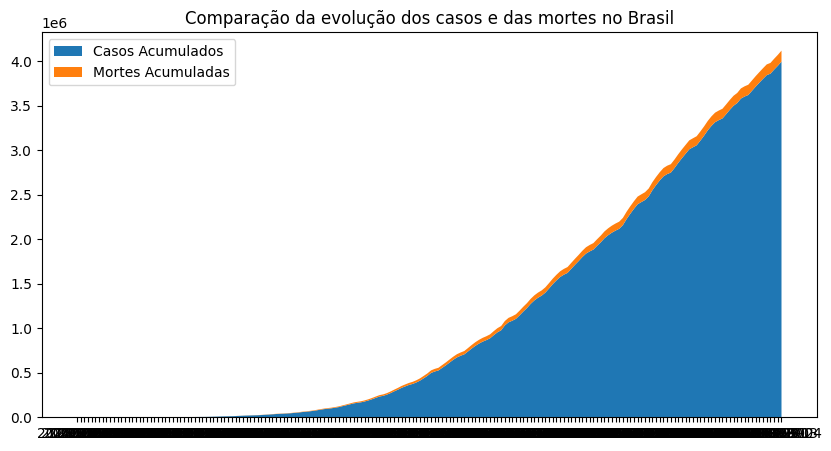

In [ ]:
# Comparando a evolução dos casos e das mortes no Brasil
plt.subplots(figsize=(10,5))
plt.stackplot(covidbrasil['date'], [covidbrasil['cumulative_cases'], covidbrasil['cumulative_deaths']],
              labels = ['Casos Acumulados', 'Mortes Acumuladas'])
plt.legend(loc = 'upper left')
plt.title('Comparação da evolução dos casos e das mortes no Brasil');

# Correlação Linear

In [ ]:
# Calculando a correlação das variáveis pelo método de Spearman - Brasil
correlacoes = covidbrasil.corr(method = 'spearman')

<ipython-input-139-f1aaf0af4e63>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
correlacoes

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.910545,0.916165,0.910210
cumulative_cases,0.910545,1.000000,0.784347,0.999354
new_deaths,0.916165,0.784347,1.000000,0.784867
cumulative_deaths,0.910210,0.999354,0.784867,1.000000


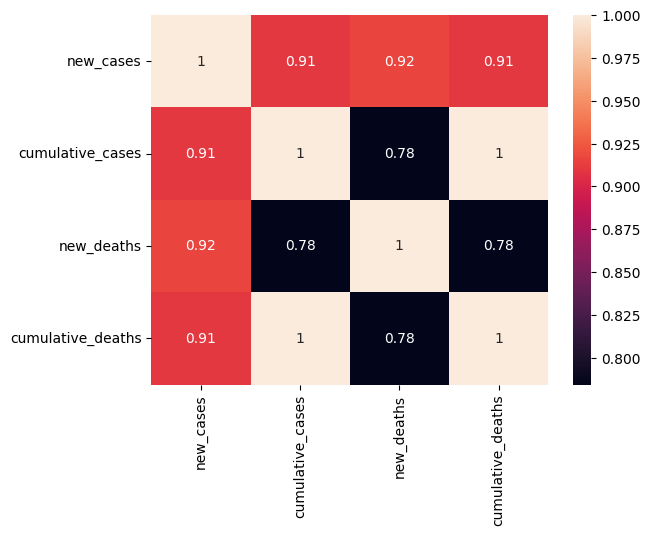

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Machine Learning

In [ ]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [ ]:
# Dimensão dos dados
covidbrasil.shape

(192, 8)

In [ ]:
# Gráfico de dispersão - número de novas mortes em função do número de novos casos (Brasil)
disp = px.scatter(x = covidbrasil.new_cases, y = covidbrasil.new_deaths)
disp.update_layout(width = 900, height = 400, title_text = 'Número de Novas Mortes em função do Número de Novos Casos')
disp.update_xaxes(title = 'Novos Casos')
disp.update_yaxes(title = 'Novas Mortes')
disp.show()

## Regressão Linear Simples

In [ ]:
# Selecionando as colunas "novos casos" e "novas mortes" - Brasil
x = covidbrasil.iloc[:, 4].values
y = covidbrasil.iloc[:, 6].values

In [ ]:
x

array([    5,     0,     0,     0,     1,     0,     0,     1,     4,
           1,    11,     0,     6,     0,     9,    18,    46,    23,
           0,    79,    34,    57,   133,   193,   283,     0,     0,
        1297,     0,   232,     0,   482,   502,   487,   352,   323,
        1138,  1119,  1074,  1146,  1222,   852,   926,  1661,  2210,
        1930,  1781,  1089,  1442,  1261,  1832,  3058,  2105,  3257,
        2917,  2055,  1927,  2498,  2678,  3735,  3503,  5514,  3379,
        4613,  5385,  6276,  7218,  6209,  4970,  4588,  6633,  6935,
       10503,  9888, 10222, 10611,  6760,  5632,  9258, 11385, 13944,
       15305, 14919,  7938, 13140, 17408, 19951, 18508, 20803, 16508,
       15813, 11687, 16324, 20599, 26417, 26928, 33274, 16409, 11598,
       28936, 28633, 30925, 30830, 27075, 18912, 15654, 32091, 32913,
       30412, 25982, 21704, 17110, 20647, 34918, 32188, 22765, 54771,
       34666, 17459, 21432, 39436, 42725, 39483, 46860, 38693, 30476,
       24052, 33846,

In [ ]:
y

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          3,    0,    7,    0,    0,   35,    0,   11,    0,   20,   15,
         22,   22,   23,   42,   40,   58,   60,   73,   54,   67,  114,
        133,  141,  115,   68,   99,  105,  204,  204,  188,  217,  206,
        115,  113,  166,  165,  407,  357,  346,  189,  338,  474,  449,
        435,  428,  421,  275,  296,  600,  615,  610,  751,  730,  496,
        396,  881,  749,  844,  824,  816,  485,  674, 1179,  888, 1188,
       1001,  965,  653,  807, 1039, 1086, 1156, 1124,  956,  480,  623,
       1262, 1349, 1473, 1005,  904,  525,  679, 1272, 1274, 1239,  909,
        892,  612,  627, 1282, 1269, 1238, 1206, 1022,  641,  654, 1374,
       1185, 1141,  990, 1109,  552,  692, 1280, 1038, 1252, 1290, 1091,
        602,  620, 1254, 1223, 1220, 1214, 1071,  631,  733, 1300, 1233,
       1322, 1163,  921,  716,  632, 1367, 1284, 13

In [ ]:
# Transformando o vetor x em matriz
x = x.reshape(-1, 1)

In [ ]:
x

array([[    5],
       [    0],
       [    0],
       [    0],
       [    1],
       [    0],
       [    0],
       [    1],
       [    4],
       [    1],
       [   11],
       [    0],
       [    6],
       [    0],
       [    9],
       [   18],
       [   46],
       [   23],
       [    0],
       [   79],
       [   34],
       [   57],
       [  133],
       [  193],
       [  283],
       [    0],
       [    0],
       [ 1297],
       [    0],
       [  232],
       [    0],
       [  482],
       [  502],
       [  487],
       [  352],
       [  323],
       [ 1138],
       [ 1119],
       [ 1074],
       [ 1146],
       [ 1222],
       [  852],
       [  926],
       [ 1661],
       [ 2210],
       [ 1930],
       [ 1781],
       [ 1089],
       [ 1442],
       [ 1261],
       [ 1832],
       [ 3058],
       [ 2105],
       [ 3257],
       [ 2917],
       [ 2055],
       [ 1927],
       [ 2498],
       [ 2678],
       [ 3735],
       [ 3503],
       [ 5514],
       [

In [ ]:
# Separando os dados para teste e treinamento

from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [ ]:
x_treinamento

array([[30355],
       [  283],
       [17408],
       [52160],
       [    4],
       [50230],
       [46934],
       [    0],
       [48105],
       [16641],
       [  926],
       [44571],
       [20229],
       [ 9258],
       [17110],
       [60091],
       [44235],
       [45048],
       [34177],
       [45392],
       [11385],
       [ 6935],
       [24052],
       [20286],
       [47161],
       [45403],
       [24578],
       [50032],
       [22765],
       [ 1138],
       [53139],
       [11598],
       [ 3379],
       [    5],
       [ 1297],
       [59961],
       [26417],
       [32188],
       [   34],
       [55891],
       [67860],
       [23529],
       [ 5632],
       [    0],
       [20257],
       [   23],
       [ 3735],
       [41576],
       [41857],
       [57837],
       [57152],
       [40816],
       [20599],
       [34918],
       [   57],
       [ 2055],
       [   46],
       [24831],
       [11687],
       [28936],
       [23101],
       [45961],
       [

In [ ]:
x_teste

array([[  193],
       [46860],
       [  323],
       [   11],
       [ 1442],
       [    0],
       [42223],
       [  232],
       [16508],
       [25800],
       [47134],
       [33846],
       [    6],
       [    9],
       [32091],
       [    0],
       [    0],
       [    0],
       [ 2498],
       [ 6276],
       [ 3257],
       [30476],
       [ 1930],
       [17459],
       [55155],
       [ 7218],
       [    1],
       [ 2210],
       [20647],
       [    0],
       [49970],
       [30412],
       [46712],
       [39924],
       [39483],
       [51147],
       [69074],
       [52383],
       [28633],
       [16324],
       [50644],
       [  852],
       [ 5385],
       [25982],
       [    0],
       [ 2917],
       [21432],
       [    0]])

In [ ]:
y_treinamento

array([1054,    7, 1179, 1274,    0, 1079, 1184,    0, 1252,  561,   67,
       1223,  620,  881,  612, 1262,  984, 1214, 1163, 1088,  749,  600,
        692,  733, 1085, 1322,  555,  892, 1238,   42, 1237,  623,  189,
          0,   35, 1311, 1156, 1269,    0, 1156, 1284,  716,  396,    0,
        632,    0,  407,  709, 1300, 1129, 1437,  921, 1086, 1282,    1,
        115,    0,  631,  807, 1262,  620,  553,  751, 1374,  614, 1071,
        366, 1188,  653,  674,    0,  480, 1473, 1091,  346,  824, 1254,
        421,    0,  816,  113,    0,  888,  296,  357,   22,   73,  496,
          0,   15,  958,  956,  485,  892,  679,  610, 1022,  921, 1352,
       1215, 1220,   60,  105, 1204,  602,  204,  188,  844,  565, 1185,
        494,  115, 1001,  275,  428,  684,  165,   22,   58,  904,  204,
       1274,    0, 1005,  572,   40, 1206, 1109, 1367,   20,  338,   68,
        855, 1124, 1212, 1154,    0,  525,  730,  114,    3,  615,    0,
        703])

In [ ]:
y_teste

array([   0,  990,   23,    0,   99,    0, 1290,   11,  965,  541, 1271,
       1280,    0,    0, 1272,    0,    0,    0,  166,  449,  217,  552,
        141,  641, 1175,  435,    0,  133,  627,    0,  905, 1239, 1038,
       1233, 1141, 1211, 1595, 1212, 1349, 1039, 1060,   54,  474,  909,
          0,  206,  654,    0])

In [ ]:
x_treinamento.size

144

In [ ]:
x_teste.size

48

In [ ]:
y_treinamento.size

144

In [ ]:
y_teste.size

48

**Modelo de Regressão Linear**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)

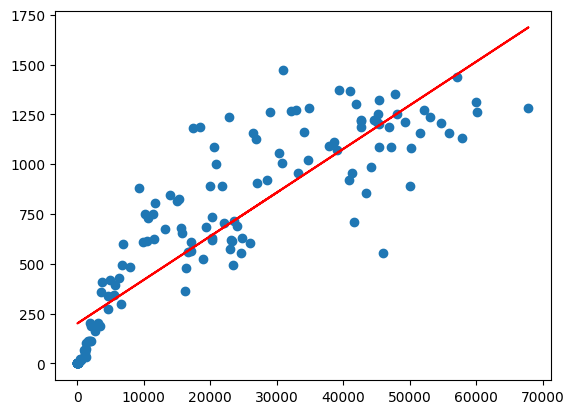

In [ ]:
# Gráfico com os dados de treinamento

# Gráfico de dispersão
import matplotlib.pyplot as plt
plt.scatter(x_treinamento, y_treinamento)

# Linha representando a previsão
plt.plot(x_treinamento, regressor.predict(x_treinamento), color = 'red');

In [ ]:
# Coeficiente de determinação
score

0.7706687225813502

In [ ]:
# Previsão para os dados de teste
previsoes = regressor.predict(x_teste)

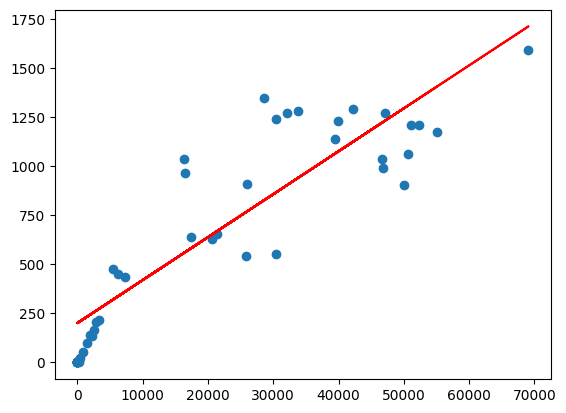

In [ ]:
# Gráfico com os dados de teste

# Gráfico de dispersão
plt.scatter(x_teste, y_teste)

# Linha representando a previsão
plt.plot(x_teste, regressor.predict(x_teste), color = 'red');

In [ ]:
# Previsão do número de mortes (considerando 80000 casos)
previsao = regressor.predict(np.array(80000).reshape(1, -1))
previsao

array([1951.4593068])

In [ ]:
# Coeficiente linear da reta
regressor.intercept_

201.0394388596036

In [ ]:
# Coeficiente angular da reta
regressor.coef_

array([0.02188025])

Equação da Reta:

Mortes = 201,03944 + 0,02188 * Casos

**Métricas de Desempenho**

In [ ]:
# Coeficiente de determinação
regressor.score(x_teste, y_teste)

0.8194463380519905

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro Médio Absoluto
print('Erro Médio Absoluto (MAE):', mean_absolute_error(y_teste, previsoes))

# Erro Quadrático Médio
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_teste, previsoes))

# Raiz do Erro Quadrático Médio
print('Raiz do Erro Quadrático Médio (RMSE):', np.sqrt(mean_squared_error(y_teste, previsoes)))

Erro Médio Absoluto (MAE): 192.0478857729403
Erro Quadrático Médio (MSE): 49488.28727462369
Raiz do Erro Quadrático Médio (RMSE): 222.4596306627872


## Regressão Polinomial

In [ ]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [ ]:
# Selecionando a coluna "data" - Brasil
x = covidbrasil.iloc[:, 0].values

In [ ]:
x

array(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-

In [ ]:
# Transformando as datas em um sequência numérica (1,2,3,4...) e, logo em seguida, em uma matriz
x = np.arange(1, len(x)+1).reshape(-1, 1)
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [ ]:
# Selecionando a coluna "casos acumulados" - Brasil
y = covidbrasil.iloc[:, 5].values
y

array([      5,       5,       5,       5,       6,       6,       6,
             7,      11,      12,      23,      23,      29,      29,
            38,      56,     102,     125,     125,     204,     238,
           295,     428,     621,     904,     904,     904,    2201,
          2201,    2433,    2433,    2915,    3417,    3904,    4256,
          4579,    5717,    6836,    7910,    9056,   10278,   11130,
         12056,   13717,   15927,   17857,   19638,   20727,   22169,
         23430,   25262,   28320,   30425,   33682,   36599,   38654,
         40581,   43079,   45757,   49492,   52995,   58509,   61888,
         66501,   71886,   78162,   85380,   91589,   96559,  101147,
        107780,  114715,  125218,  135106,  145328,  155939,  162699,
        168331,  177589,  188974,  202918,  218223,  233142,  241080,
        254220,  271628,  291579,  310087,  330890,  347398,  363211,
        374898,  391222,  411821,  438238,  465166,  498440,  514849,
        526447,  555

In [ ]:
# Separando os dados para teste e treinamento

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [ ]:
x_treinamento.size

144

In [ ]:
x_teste.size

48

In [ ]:
y_treinamento.size

144

In [ ]:
y_teste.size

48

**Modelo de Regressão Polinomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
x_treinamento_poly = poly.fit_transform(x_treinamento)
x_teste_poly = poly.transform(x_teste)

In [ ]:
# Associando à regressão linear

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_treinamento_poly, y_treinamento)
score = regressor.score(x_treinamento_poly, y_treinamento)

In [ ]:
# Previsão para os dados de teste
previsoes = regressor.predict(x_teste_poly)

In [ ]:
previsoes.size

48

In [ ]:
# Criação de uma sequência numérica para realizar previsões (transformada depois em matriz)
forecast = np.arange(len(x) + 20).reshape(-1,1) # + 20 é para uma previsão de 20 dias a mais

In [ ]:
# Dimensão dos dados
forecast.shape

(212, 1)

In [ ]:
# Novos dados de treinamento --> x_treinamento_total

x_treinamento_total = poly.transform(forecast)

# Dimensão dos dados
x_treinamento_total.shape

(212, 3)

In [ ]:
x_treinamento_total

array([[1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00],
       [1.0000e+00, 4.0000e+00, 1.6000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01],
       [1.0000e+00, 6.0000e+00, 3.6000e+01],
       [1.0000e+00, 7.0000e+00, 4.9000e+01],
       [1.0000e+00, 8.0000e+00, 6.4000e+01],
       [1.0000e+00, 9.0000e+00, 8.1000e+01],
       [1.0000e+00, 1.0000e+01, 1.0000e+02],
       [1.0000e+00, 1.1000e+01, 1.2100e+02],
       [1.0000e+00, 1.2000e+01, 1.4400e+02],
       [1.0000e+00, 1.3000e+01, 1.6900e+02],
       [1.0000e+00, 1.4000e+01, 1.9600e+02],
       [1.0000e+00, 1.5000e+01, 2.2500e+02],
       [1.0000e+00, 1.6000e+01, 2.5600e+02],
       [1.0000e+00, 1.7000e+01, 2.8900e+02],
       [1.0000e+00, 1.8000e+01, 3.2400e+02],
       [1.0000e+00, 1.9000e+01, 3.6100e+02],
       [1.0000e+00, 2.0000e+01, 4.0000e+02],
       [1.0000e+00, 2.1000e+01, 4.4100e+02],
       [1.

In [ ]:
# Previsão para os novos dados de treinamento
previsao_total = regressor.predict(x_treinamento_total)
len(previsao_total)

212

In [ ]:
previsao_total

array([ 1.70906899e+05,  1.58058598e+05,  1.45562695e+05,  1.33419188e+05,
        1.21628078e+05,  1.10189365e+05,  9.91030491e+04,  8.83691301e+04,
        7.79876080e+04,  6.79584829e+04,  5.82817547e+04,  4.89574234e+04,
        3.99854892e+04,  3.13659518e+04,  2.30988114e+04,  1.51840680e+04,
        7.62172145e+03,  4.11771892e+02, -6.44578072e+03, -1.29509364e+04,
       -1.91036951e+04, -2.49040569e+04, -3.03520217e+04, -3.54475896e+04,
       -4.01907606e+04, -4.45815346e+04, -4.86199116e+04, -5.23058917e+04,
       -5.56394749e+04, -5.86206611e+04, -6.12494504e+04, -6.35258427e+04,
       -6.54498381e+04, -6.70214365e+04, -6.82406380e+04, -6.91074425e+04,
       -6.96218501e+04, -6.97838607e+04, -6.95934745e+04, -6.90506912e+04,
       -6.81555110e+04, -6.69079339e+04, -6.53079598e+04, -6.33555888e+04,
       -6.10508208e+04, -5.83936559e+04, -5.53840940e+04, -5.20221352e+04,
       -4.83077795e+04, -4.42410268e+04, -3.98218771e+04, -3.50503305e+04,
       -2.99263870e+04, -

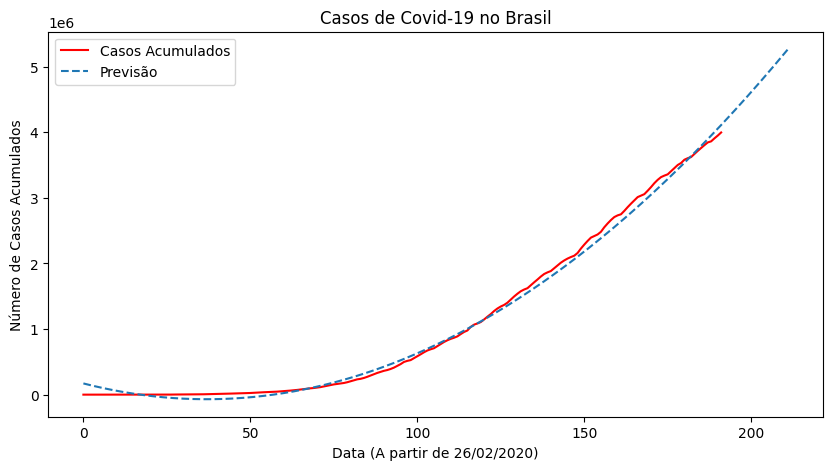

In [ ]:
# Gráfico dos casos acumulados com previsão para os próximos 20 dias

plt.subplots(figsize=(10,5))

# Casos Acumulados
plt.plot(forecast[:-20], y, color = 'red')

# Previsão
plt.plot(forecast, previsao_total, linestyle = 'dashed')

plt.title('Casos de Covid-19 no Brasil')
plt.xlabel('Data (A partir de 26/02/2020)')
plt.ylabel('Número de Casos Acumulados')
plt.legend(['Casos Acumulados', 'Previsão']);

In [ ]:
# Previsão para a data correspondente ao número 100
previsao_total[100]

630441.7109794475

**Métricas de Desempenho**

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Coeficiente de determinação
score

0.9974077205025352

In [ ]:
# Previsão para os dados de teste
poly_teste_pred = regressor.predict(x_teste_poly)

In [ ]:
# Erro Médio Absoluto
print('MAE:', mean_absolute_error(poly_teste_pred, y_teste))

# Erro Quadrático Médio
print('MSE:', mean_squared_error(poly_teste_pred, y_teste))

# Raiz do Erro Quadrático Médio
print('RMSE:', np.sqrt(mean_squared_error(poly_teste_pred, y_teste)))

MAE: 56411.590189479546
MSE: 4214080216.6640987
RMSE: 64915.94732162582
